In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('data/walmart.csv')


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Week'] = df['Date'].dt.isocalendar().week

# Define X and y 

In [5]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42


In [6]:
labels_not_in_X = ['Weekly_Sales','Store', 'Date']
X = df.drop(labels=(df[labels_not_in_X]), axis=1)
y = df['Weekly_Sales']
y = pd.DataFrame(y)

# Split the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [8]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.9, shuffle=False, random_state=1)

In [9]:
X_train

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
1817,0,25.61,3.056,130.244000,6.104,2
678,0,48.25,3.510,221.010634,5.943,7
2901,0,51.71,2.771,211.547030,8.163,46
1750,0,68.74,2.853,126.234600,7.795,39
3822,0,42.52,3.796,141.016192,8.009,5
...,...,...,...,...,...,...
905,1,13.76,2.829,191.255700,9.137,52
5192,0,51.83,2.843,210.237249,8.476,49
3980,0,84.51,4.110,131.098323,11.627,20
235,0,59.33,3.297,217.645539,7.441,45


In [10]:
y_train

,Weekly_Sales
1817,1794962.64
678,356427.98
2901,756288.89
1750,1765584.48
3822,1564246.02
...,...
905,729572.08
5192,511207.52
3980,1213310.45
235,1920725.15


# Scale all X and y

In [11]:
scaler = MinMaxScaler()
labels_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week']

# X
X_train_norm = pd.DataFrame(X_train.copy())
X_train_norm[labels_to_scale] = scaler.fit_transform(X_train_norm[labels_to_scale])

X_valid_norm = pd.DataFrame(X_valid.copy())
X_valid_norm[labels_to_scale] = scaler.fit_transform(X_valid_norm[labels_to_scale])

X_test_norm = pd.DataFrame(X_test.copy())
X_test_norm[labels_to_scale] = scaler.fit_transform(X_test_norm[labels_to_scale])

# y
y_train_norm = pd.DataFrame(y_train.copy())
y_train_norm['Weekly_Sales'] = scaler.fit_transform(y_train_norm.values.reshape(-1, 1))

y_valid_norm = pd.DataFrame(y_valid.copy())
y_valid_norm['Weekly_Sales'] = scaler.fit_transform(y_valid_norm.values.reshape(-1, 1))

y_test_norm = pd.DataFrame(y_test.copy())
y_test_norm['Weekly_Sales'] = scaler.fit_transform(y_test_norm.values.reshape(-1, 1))

### Show X_train normalization result (histogram)

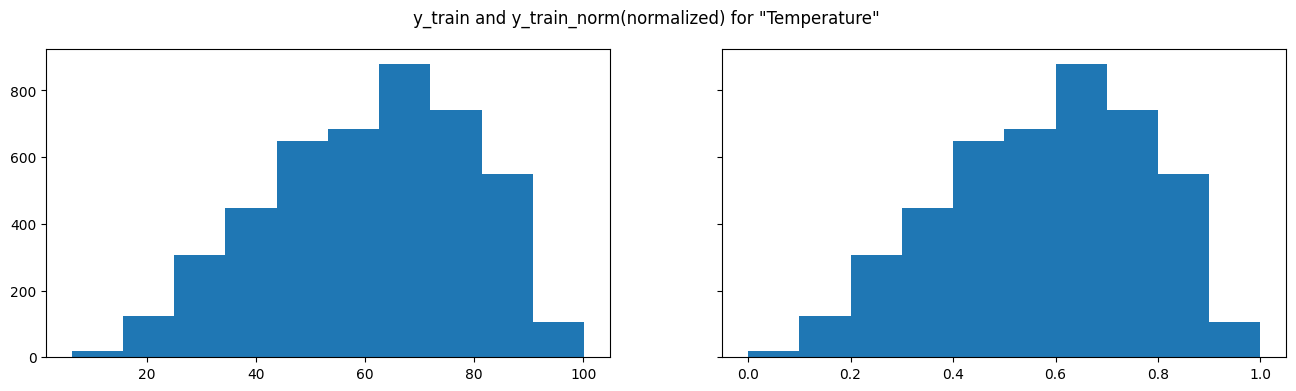

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
axs[0].hist(X_train['Temperature'])
axs[1].hist(X_train_norm['Temperature'])
fig.suptitle('y_train and y_train_norm(normalized) for "Temperature"')
plt.show()

In [13]:
X_train_norm

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
1817,0,0.206368,0.277749,0.041317,0.213245,0.019608
678,0,0.447450,0.509974,0.938497,0.197815,0.117647
2901,0,0.484293,0.131969,0.844954,0.410581,0.882353
1750,0,0.665637,0.173913,0.001686,0.375311,0.745098
3822,0,0.386434,0.656266,0.147794,0.395821,0.078431
...,...,...,...,...,...,...
905,1,0.080183,0.161637,0.644385,0.503929,1.000000
5192,0,0.485571,0.168798,0.832008,0.440579,0.941176
3980,0,0.833564,0.816880,0.049762,0.742572,0.372549
235,0,0.565435,0.401023,0.905235,0.341384,0.862745


### Show y_train normalization result (histogram)

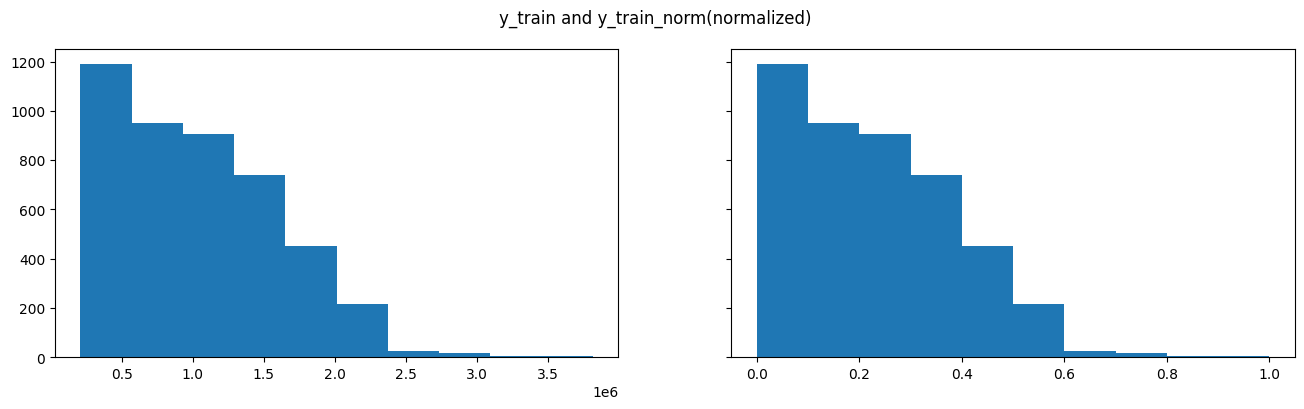

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
axs[0].hist(y_train)
axs[1].hist(y_train_norm)
fig.suptitle('y_train and y_train_norm(normalized)')
plt.show()

In [15]:
y_train_norm

,Weekly_Sales
1817,0.439210
678,0.040580
2901,0.151385
1750,0.431069
3822,0.375276
...,...
905,0.143981
5192,0.083471
3980,0.278029
235,0.474060


# Plot features

### 1. Week


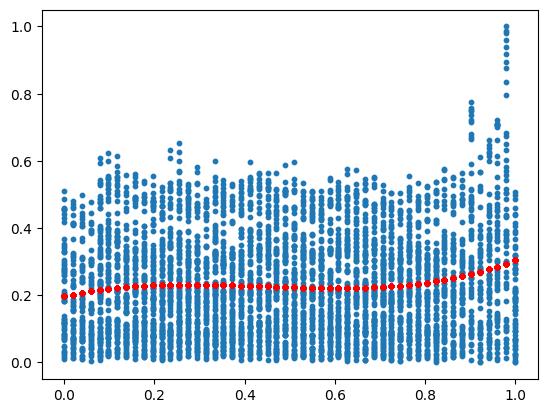

In [16]:
model1 = LinearRegression()
poly = PolynomialFeatures(degree=3, include_bias=False)

week_2d = X_train_norm['Week'].values.reshape(-1, 1)
poly_week = poly.fit_transform(week_2d)
model1.fit(poly_week, y_train_norm)

plt.scatter(X_train_norm['Week'], y_train_norm, s=10)
plt.scatter(X_train_norm['Week'], model1.predict(poly_week), color='r', s=10)

### 2. Holiday_Flag

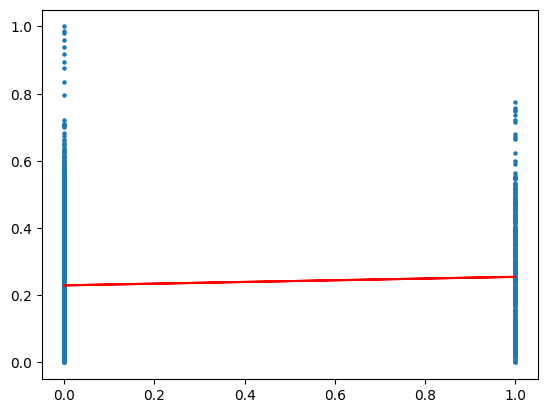

In [17]:
plt.scatter(X_train_norm['Holiday_Flag'], y_train_norm, s=5)
model2 = LinearRegression().fit(X_train_norm['Holiday_Flag'].values.reshape(-1, 1), y_train_norm)
plt.plot(X_train_norm['Holiday_Flag'].values.reshape(-1, 1), model2.predict(X_train_norm['Holiday_Flag'].values.reshape(-1, 1)), color='r')


### 3. Temperature


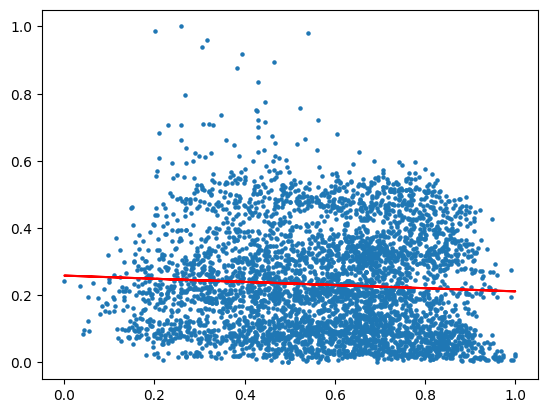

In [18]:
plt.scatter(X_train_norm['Temperature'], y_train_norm, s=5)
model3 = LinearRegression().fit(X_train_norm['Temperature'].values.reshape(-1, 1), y_train_norm)
plt.plot(X_train_norm['Temperature'].values.reshape(-1, 1), model3.predict(X_train_norm['Temperature'].values.reshape(-1, 1)), color='r')

### 4. Fuel_Price


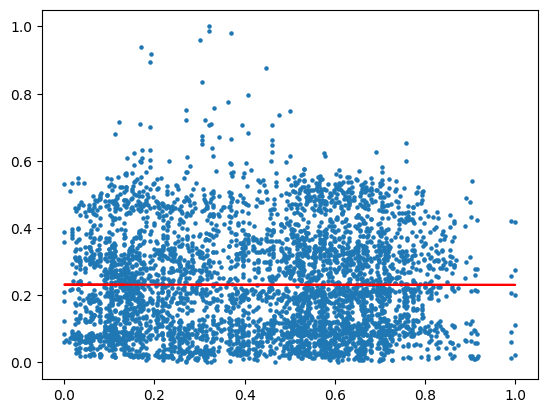

In [19]:
plt.scatter(X_train_norm['Fuel_Price'], y_train_norm, s=5)
model4 = LinearRegression().fit(X_train_norm['Fuel_Price'].values.reshape(-1, 1), y_train_norm)
plt.plot(X_train_norm['Fuel_Price'].values.reshape(-1, 1), model4.predict(X_train_norm['Fuel_Price'].values.reshape(-1, 1)), color='r')

### 5. CPI	


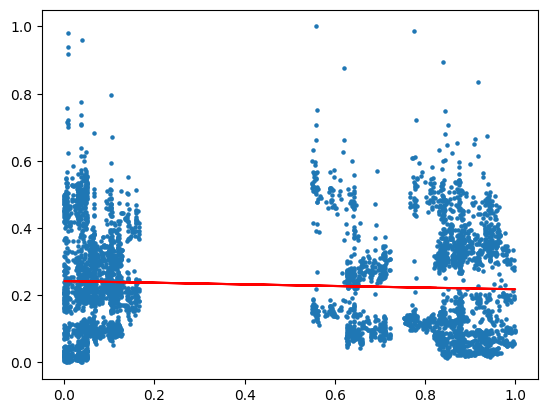

In [20]:
plt.scatter(X_train_norm['CPI'], y_train_norm, s=5)
model5 = LinearRegression().fit(X_train_norm['CPI'].values.reshape(-1, 1), y_train_norm)
plt.plot(X_train_norm['CPI'].values.reshape(-1, 1), model5.predict(X_train_norm['CPI'].values.reshape(-1, 1)), color='r')

### 6. Unemployment

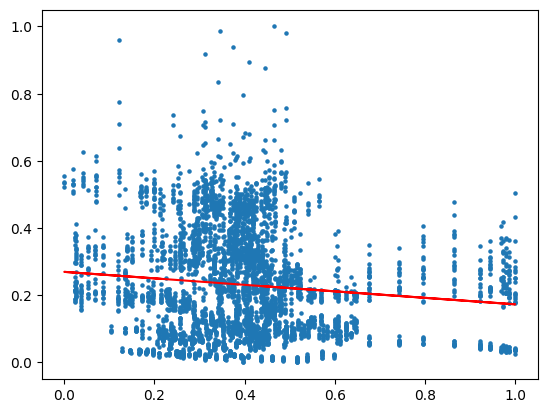

In [21]:
plt.scatter(X_train_norm['Unemployment'], y_train_norm, s=5)
model6 = LinearRegression().fit(X_train_norm['Unemployment'].values.reshape(-1, 1), y_train_norm)
plt.plot(X_train_norm['Unemployment'].values.reshape(-1, 1), model6.predict(X_train_norm['Unemployment'].values.reshape(-1, 1)), color='r')

# Train model

In [36]:
model = LinearRegression()
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train_norm)
model.fit(X_train_poly, y_train_norm)

y_true = y_valid_norm
X_valid_poly = poly.fit_transform(X_valid_norm)
y_pred = model.predict(X_valid_poly)
mean_absolute_error(y_true, y_pred)



0.14062083583369422